Code copied from knn_lacounty_biggersample and adjusted to evaluate and compare models with different values of k. 
Summary of results: 
1) k = 41 minimizes the error for all the test data, but the minimum error is still 119, which is not great. 
2) k = 44 minimizes the error for properties assessed in 2021, but the minimum error is still 152.5, which is also bad. 

In [2]:
import numpy as np
import pandas as pd
import psycopg2
from psycopg2.extras import execute_values

In [3]:
import matplotlib.pyplot as plt

In [4]:
# Change these variables to suit local database and associated Postgresql username and password 
db_name = "parcelDatabase"
username = "postgres"
pw = "correcthorsebatteryalien"

In [5]:
# Connect to local database
try:
        conn = psycopg2.connect(database=db_name, port = 5432, user=username, password=pw)
        print("successfully connected to database")
except:
        print("I am unable to connect to the database")

successfully connected to database


In [6]:
# Create dataframe
df = pd.read_sql_query('select sqftmain, roll_landvalue, roll_landbaseyear, center_lat, center_lon from "parcelTable"', con=conn)

In [7]:
# Preliminary cleaning
for col in df:
    # Removes any row where column value is ''
    df = df[df[col]!= ''] 
    
    # Change data type to int and float
    if col == 'roll_landbaseyear':
        df[col] = df[col].astype(int)
    else:
        df[col] = df[col].astype(float)

# Add land value per square foot to dataframe
df['landvaluepersqft'] = df['roll_landvalue']/df['sqftmain']
df

,sqftmain,roll_landvalue,roll_landbaseyear,center_lat,center_lon,landvaluepersqft
0,0.0,3198.0,2014,33.977042,-118.046041,inf
1,0.0,805385.0,2014,34.075431,-118.255099,inf
2,0.0,2347.0,2001,33.807619,-118.184558,inf
3,0.0,2060.0,2007,34.044677,-118.266177,inf
4,0.0,15693.0,1997,34.141477,-118.220381,inf
...,...,...,...,...,...,...
40081,1208.0,173000.0,2011,33.895317,-118.125651,143.211921
40082,6720.0,649355.0,2012,34.378673,-118.547262,96.630208
40083,2120.0,650869.0,2005,33.969522,-118.148882,307.013679
40084,12666.0,249582.0,2002,34.140756,-118.219785,19.704879


In [8]:
# Clean data
df= df[df['sqftmain'] != 0]
df= df[df['landvaluepersqft'] < 1000]
df

,sqftmain,roll_landvalue,roll_landbaseyear,center_lat,center_lon,landvaluepersqft
15,779.0,65955.0,1987,34.095796,-118.228163,84.666239
21,1000.0,8339.0,1975,33.947870,-118.265508,8.339000
24,1250.0,50626.0,1975,33.996590,-118.429746,40.500800
34,612.0,61899.0,1975,34.078510,-118.118021,101.142157
38,621.0,31585.0,1975,33.996502,-118.428373,50.861514
...,...,...,...,...,...,...
40081,1208.0,173000.0,2011,33.895317,-118.125651,143.211921
40082,6720.0,649355.0,2012,34.378673,-118.547262,96.630208
40083,2120.0,650869.0,2005,33.969522,-118.148882,307.013679
40084,12666.0,249582.0,2002,34.140756,-118.219785,19.704879


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

In [10]:
# Set dependent and independent variables
X = pd.DataFrame(df[['roll_landbaseyear','center_lat', 'center_lon']])
y = pd.DataFrame(df['landvaluepersqft']) 

In [11]:
# Split data randomly - 30% used for test data; 70% used for training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
# For each value of k (ranges from 10 to 200 in increments of 10), create a model, make predictions for test data and find error
rmse_vals = []
k_vals = []
for k in range(10,400,10):
    # Create model
    model = KNeighborsRegressor(n_neighbors= k)
    model.fit(X_train,y_train)
    # Make predictions
    y_pred = model.predict(X_test)
    # Find error
    error = sqrt(mean_squared_error(y_test, y_pred))
    rmse_vals += [error]
    k_vals += [k]
    print('RMSE value for k = ', k, 'is:', error)

RMSE value for k =  10 is: 120.64767306342094
RMSE value for k =  20 is: 119.22308285902994
RMSE value for k =  30 is: 119.12941998471742
RMSE value for k =  40 is: 119.06191344009534
RMSE value for k =  50 is: 119.42393990459641
RMSE value for k =  60 is: 119.89490810411856
RMSE value for k =  70 is: 120.0576219694093
RMSE value for k =  80 is: 120.39872800956542
RMSE value for k =  90 is: 120.72479950165582
RMSE value for k =  100 is: 121.10886554164112
RMSE value for k =  110 is: 121.32742566978033
RMSE value for k =  120 is: 121.54586877257735
RMSE value for k =  130 is: 121.86242095002443
RMSE value for k =  140 is: 122.0963282281584
RMSE value for k =  150 is: 122.2725120431551
RMSE value for k =  160 is: 122.40525564980562
RMSE value for k =  170 is: 122.54823249864737
RMSE value for k =  180 is: 122.71199769564232
RMSE value for k =  190 is: 122.78757642722128
RMSE value for k =  200 is: 122.87904340871532
RMSE value for k =  210 is: 122.9009159672947
RMSE value for k =  220 is

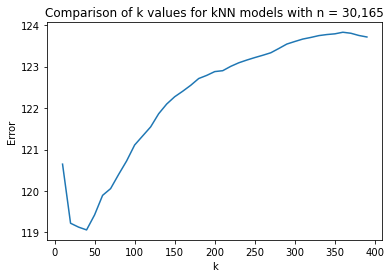

In [23]:
plt.plot(k_vals,rmse_vals)
plt.xlabel('k')
plt.ylabel('Error')
plt.title("Comparison of k values for kNN models with n = 30,165")
plt.show()

In [24]:
# We can see from the above plot that the minimum error lies in the 30-50 range so repeat the above process for that range
rmse_vals2 = []
k_vals2 = []
for k in range(30,50):
    # Create model
    model = KNeighborsRegressor(n_neighbors= k)
    model.fit(X_train,y_train)
    # Make predictions
    y_pred = model.predict(X_test)
    # Find error
    error = sqrt(mean_squared_error(y_test, y_pred))
    rmse_vals2 += [error]
    k_vals2 += [k]
    print('RMSE value for k = ', k, 'is:', error)

RMSE value for k =  30 is: 119.12941998471742
RMSE value for k =  31 is: 119.01857929737503
RMSE value for k =  32 is: 119.00318370136
RMSE value for k =  33 is: 119.02990070668432
RMSE value for k =  34 is: 119.02822238841907
RMSE value for k =  35 is: 119.04839512244867
RMSE value for k =  36 is: 119.04690951759366
RMSE value for k =  37 is: 119.01157980928858
RMSE value for k =  38 is: 119.03847796643821
RMSE value for k =  39 is: 119.03686702455087
RMSE value for k =  40 is: 119.06191344009534
RMSE value for k =  41 is: 119.00021895480336
RMSE value for k =  42 is: 119.04104659272245
RMSE value for k =  43 is: 119.10960414303331
RMSE value for k =  44 is: 119.1539818885595
RMSE value for k =  45 is: 119.14524916024429
RMSE value for k =  46 is: 119.22848380417746
RMSE value for k =  47 is: 119.29339489400022
RMSE value for k =  48 is: 119.33991221721755
RMSE value for k =  49 is: 119.34950116395609


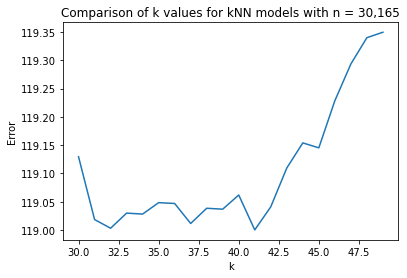

In [25]:
plt.plot(k_vals2)
plt.xlabel('k')
plt.ylabel('Error')
plt.title("Comparison of k values for kNN models with n = 30,165")
plt.show()

We can see that k = 41 minimizes the error, but the error is still 119, which is not great. 

In [27]:
# Create a dataframe that contains all columns, but only rows where landbaseyear is 2021
df_assess = df.copy()
df_assess = df_assess[df_assess['roll_landbaseyear'] == 2021]
df_assess

,sqftmain,roll_landvalue,roll_landbaseyear,center_lat,center_lon,landvaluepersqft
410,1300.0,180000.0,2021,33.976127,-118.256092,138.461538
1972,2211.0,300000.0,2021,33.854559,-118.190454,135.685210
4496,10010.0,2000000.0,2021,34.039579,-118.315336,199.800200
7132,1800.0,460000.0,2021,33.835648,-118.328291,255.555556
9987,6396.0,2000000.0,2021,33.771413,-118.150569,312.695435
10749,1855.0,80000.0,2021,34.678218,-118.451900,43.126685
11612,152076.0,12715000.0,2021,34.223669,-118.377940,83.609511
11898,95976.0,8850000.0,2021,34.109284,-117.824483,92.210553
12887,2080.0,1000000.0,2021,33.918572,-118.401891,480.769231
15333,1561.0,1000000.0,2021,34.083735,-118.599532,640.614990


In [28]:
# Make predictions for the land value per squarefoot for the properties that were assessed in 2021 (y_assess_pred), 
# and compare them to the actual values (y_assess) for various k values
X_assess = pd.DataFrame(df_assess[['roll_landbaseyear','center_lat', 'center_lon']])
y_assess = pd.DataFrame(df_assess['landvaluepersqft'])

rmse_vals3 = []
k_vals3 = []
for k in range(30,50):
    # Create model
    model = KNeighborsRegressor(n_neighbors= k)
    model.fit(X_train,y_train)
    # Make predictions
    y_assess_pred = model.predict(X_assess)
    # Find error
    error = sqrt(mean_squared_error(y_assess, y_assess_pred))
    rmse_vals3 += [error]
    k_vals3 += [k]
    print('RMSE value for k = ', k, 'is:', error)

RMSE value for k =  30 is: 155.2284471563562
RMSE value for k =  31 is: 153.59033879576037
RMSE value for k =  32 is: 153.43395787930365
RMSE value for k =  33 is: 153.93749687722553
RMSE value for k =  34 is: 153.9635985928975
RMSE value for k =  35 is: 153.70523205778116
RMSE value for k =  36 is: 154.51275128489462
RMSE value for k =  37 is: 154.3016669120617
RMSE value for k =  38 is: 154.3031866146119
RMSE value for k =  39 is: 153.0602154965008
RMSE value for k =  40 is: 153.12087686923007
RMSE value for k =  41 is: 153.34265598758293
RMSE value for k =  42 is: 152.774104923182
RMSE value for k =  43 is: 153.78517005852768
RMSE value for k =  44 is: 152.54143031111573
RMSE value for k =  45 is: 152.67362944153237
RMSE value for k =  46 is: 153.0427416493089
RMSE value for k =  47 is: 153.63137957560042
RMSE value for k =  48 is: 154.47441074944027
RMSE value for k =  49 is: 154.35876363045548


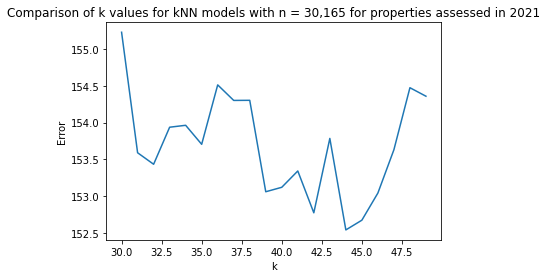

In [30]:
plt.plot(k_vals3, rmse_vals3)
plt.xlabel('k')
plt.ylabel('Error')
plt.title("Comparison of k values for kNN models with n = 30,165 for properties assessed in 2021")
plt.show()

We can see that k = 44 minimizes the error, but the error is still 152.5, which is still bad. 